In [1]:
import numpy as np
import pandas as pd

# Importando a base de dados

In [2]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [3]:
df = pd.read_csv("/content/gdrive/MyDrive/logArthur/kepler.csv")

In [4]:
df.tail()

,sky_position,max_power,period_at_max_power,transit_time_at_max_power,duration_at_max_power
980,Kepler-995,65057.308271,18.3981398139814 d,140.928033,0.33 d
981,Kepler-996,48.911612,22.62796279627963 d,144.567433,0.25 d
982,Kepler-997,3093.543031,283.1611161116112 d,284.028951,0.33 d
983,Kepler-998,253.822173,16.96159615961596 d,143.011726,0.1 d
984,Kepler-999,1077.210705,328.45214521452147 d,245.593376,0.33 d


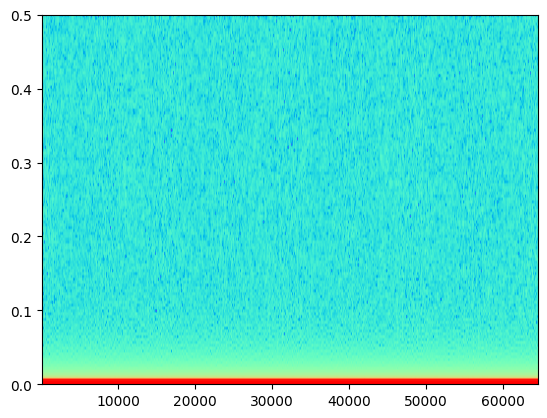

In [5]:
array1 = np.loadtxt(f'/content/gdrive/MyDrive/log_lc_flux/Kepler-69.csv')#.astype(np.float64)
import matplotlib.pyplot as plt

plt.specgram(array1,Fs=1,cmap="rainbow")
plt.show()

# plt.plot(range(len(array1)),array1, 'ro')

In [ ]:
cutoff_value = 1000
has_flux = []

for value in df['max_power']:
    if value > cutoff_value:
        has_flux.append(1)
    else:
        has_flux.append(0) 

In [ ]:
df_labeled = df

df_labeled['has_flux'] = has_flux

df_labeled.tail()

,sky_position,max_power,period_at_max_power,transit_time_at_max_power,duration_at_max_power,has_flux
980,Kepler-995,65057.308271,18.3981398139814 d,140.928033,0.33 d,1
981,Kepler-996,48.911612,22.62796279627963 d,144.567433,0.25 d,0
982,Kepler-997,3093.543031,283.1611161116112 d,284.028951,0.33 d,1
983,Kepler-998,253.822173,16.96159615961596 d,143.011726,0.1 d,0
984,Kepler-999,1077.210705,328.45214521452147 d,245.593376,0.33 d,1


## Salvando o df criado 

In [ ]:
df_labeled.to_csv("/content/gdrive/MyDrive/logArthur/df_labeled",index=False)

## Lendo do df criado

In [ ]:
df_labeled = pd.read_csv("/content/gdrive/MyDrive/logArthur/df_labeled")
df_labeled.tail()

,sky_position,max_power,period_at_max_power,transit_time_at_max_power,duration_at_max_power,has_flux
980,Kepler-995,65057.308271,18.3981398139814 d,140.928033,0.33 d,1
981,Kepler-996,48.911612,22.62796279627963 d,144.567433,0.25 d,0
982,Kepler-997,3093.543031,283.1611161116112 d,284.028951,0.33 d,1
983,Kepler-998,253.822173,16.96159615961596 d,143.011726,0.1 d,0
984,Kepler-999,1077.210705,328.45214521452147 d,245.593376,0.33 d,1


## Criando a coluna com os dados da curva de luz

In [ ]:
data_flux = []

for i in range (1,1000):
    sky_position = "Kepler-" + str(i) 
    try:
        actual = np.loadtxt(f'/content/gdrive/MyDrive/log_lc_flux/{sky_position}.csv').astype(np.float64)
        data_flux.append(actual)
    except:
        print(f'Failed to {sky_position}')

Failed to Kepler-72
Failed to Kepler-73
Failed to Kepler-203
Failed to Kepler-204
Failed to Kepler-205
Failed to Kepler-317
Failed to Kepler-611
Failed to Kepler-612
Failed to Kepler-613
Failed to Kepler-941
Failed to Kepler-942
Failed to Kepler-943
Failed to Kepler-944
Failed to Kepler-945


In [ ]:
df_final = df_labeled

df_final['lc_flux'] = data_flux

df_final.tail()

,sky_position,max_power,period_at_max_power,transit_time_at_max_power,duration_at_max_power,has_flux,lc_flux
980,Kepler-995,65057.308271,18.3981398139814 d,140.928033,0.33 d,1,"[0.9999604452048021, 1.0000610666857797, 0.999..."
981,Kepler-996,48.911612,22.62796279627963 d,144.567433,0.25 d,0,"[1.0000429087866467, 0.999736766387529, 0.9998..."
982,Kepler-997,3093.543031,283.1611161116112 d,284.028951,0.33 d,1,"[0.9998879432678223, 0.9998437166213989, 0.999..."
983,Kepler-998,253.822173,16.96159615961596 d,143.011726,0.1 d,0,"[1.0000904203054084, 1.0000009536748848, 1.000..."
984,Kepler-999,1077.210705,328.45214521452147 d,245.593376,0.33 d,1,"[0.9999930262565613, 1.0000970363616943, 0.999..."


In [ ]:
print(len(df_final.iloc[-1]['lc_flux']))
df_final.lc_flux.dtype

65205


dtype('O')

## salvando a base de dados com a coluna usada para o treinamento

In [ ]:
from operator import index
# como o arquivo é grande, iremos salvar no formato hdf5
# para mais informações acessar link: https://en.moonbooks.org/Articles/How-to-save-a-large-dataset-in-a-hdf5-file-using-python--Quick-Guide/
# import h5py

# with h5py.File('/content/gdrive/MyDrive/logArthur/df_final.h5', 'w') as hf:
#     hf.create_dataset('df_final', data=df_final,shape=(985,7))

df_labeled.to_pickle("/content/gdrive/MyDrive/logArthur/df_final.pkl")

## lendo o df final

In [6]:
df_final = pd.read_pickle("/content/gdrive/MyDrive/logArthur/df_final.pkl")
df_final.tail()

,sky_position,max_power,period_at_max_power,transit_time_at_max_power,duration_at_max_power,has_flux,lc_flux
980,Kepler-995,65057.308271,18.3981398139814 d,140.928033,0.33 d,1,"[0.9999604452048021, 1.0000610666857797, 0.999..."
981,Kepler-996,48.911612,22.62796279627963 d,144.567433,0.25 d,0,"[1.0000429087866467, 0.999736766387529, 0.9998..."
982,Kepler-997,3093.543031,283.1611161116112 d,284.028951,0.33 d,1,"[0.9998879432678223, 0.9998437166213989, 0.999..."
983,Kepler-998,253.822173,16.96159615961596 d,143.011726,0.1 d,0,"[1.0000904203054084, 1.0000009536748848, 1.000..."
984,Kepler-999,1077.210705,328.45214521452147 d,245.593376,0.33 d,1,"[0.9999930262565613, 1.0000970363616943, 0.999..."


In [7]:
df_final.describe()

,max_power,transit_time_at_max_power,has_flux
count,9.850000e+02,985.000000,985.000000
mean,1.681102e+05,192.708075,0.450761
std,1.618308e+06,97.754257,0.497822
min,2.973308e+01,120.754127,0.000000
25%,2.745566e+02,137.157342,0.000000
50%,7.866904e+02,149.227403,0.000000
75%,3.485844e+03,207.342132,1.000000
max,3.969480e+07,1488.487233,1.000000


In [8]:
df_final.shape

(985, 7)

In [9]:
print(len(df_final.iloc[-1].lc_flux))

65205


In [35]:
info = []
for data in df_final['lc_flux']:
    info.append(len(data))

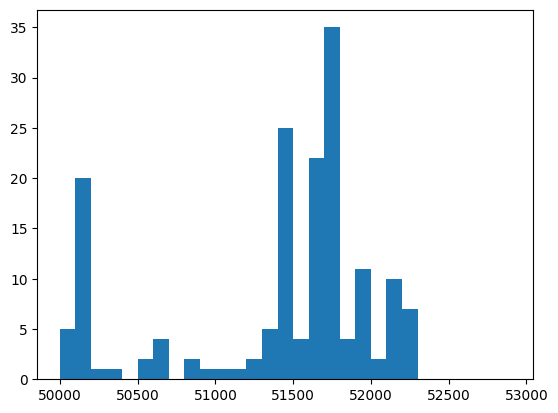

In [41]:
faixa = np.arange(50e3,53e3,100)
plt.hist(info, bins=faixa);

## Vamos filtrar o df para que tenha apenas fluxos com pelo menos 64k pontos, e quem tiver mais, pegar só os 64k primeiros

In [13]:
conditional_array = [((len(data) > 64000) & (len(data) < 65000)) for data in df_final['lc_flux']]

conditional_array.count(1)

548

In [14]:
df_filtered = df_final[conditional_array]

df_filtered.describe()

,max_power,transit_time_at_max_power,has_flux
count,5.480000e+02,548.000000,548.000000
mean,4.392938e+04,185.054270,0.452555
std,2.674665e+05,78.707839,0.498199
min,2.973308e+01,120.754127,0.000000
25%,2.735718e+02,138.170839,0.000000
50%,7.635670e+02,148.887245,0.000000
75%,3.508068e+03,189.943774,1.000000
max,4.499717e+06,509.292285,1.000000


In [16]:
df_filtered.shape

(548, 7)

In [17]:
df_filtered.tail()

,sky_position,max_power,period_at_max_power,transit_time_at_max_power,duration_at_max_power,has_flux,lc_flux
977,Kepler-992,70047.332502,26.17941794179418 d,143.109335,0.33 d,1,"[1.0008823871612549, 1.0000814199447632, 0.999..."
979,Kepler-994,13975.840513,347.96519651965195 d,381.677266,0.33 d,1,"[1.0026289861438968, 1.0031007410387198, 1.002..."
980,Kepler-995,65057.308271,18.3981398139814 d,140.928033,0.33 d,1,"[0.9999604452048021, 1.0000610666857797, 0.999..."
981,Kepler-996,48.911612,22.62796279627963 d,144.567433,0.25 d,0,"[1.0000429087866467, 0.999736766387529, 0.9998..."
983,Kepler-998,253.822173,16.96159615961596 d,143.011726,0.1 d,0,"[1.0000904203054084, 1.0000009536748848, 1.000..."


In [18]:
len(df_filtered.iloc[-1].lc_flux)

64730

### agora que temos filtrado por pelo menos 64k, quem tiver mais que isso, vamos considerar somente os primeiros 64k valores.

In [19]:
df_filtered['lc_flux_2'] = df_filtered['lc_flux']
df_filtered['lc_flux_2'] = [lista[:64000] for lista in df_filtered['lc_flux']]
df_filtered['lc_flux_2'] = [np.array(lista) for lista in df_filtered['lc_flux_2']]

<ipython-input-19-5a8801457114>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['lc_flux_2'] = df_filtered['lc_flux']
<ipython-input-19-5a8801457114>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df_filtered['lc_flux_2'] = [lista[:64000] for lista in df_filtered['lc_flux']]
<ipython-input-19-5a8801457114>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

In [20]:
type(df_filtered['lc_flux_2'])

pandas.core.series.Series

In [21]:
len(df_filtered.iloc[0].lc_flux_2)

64000

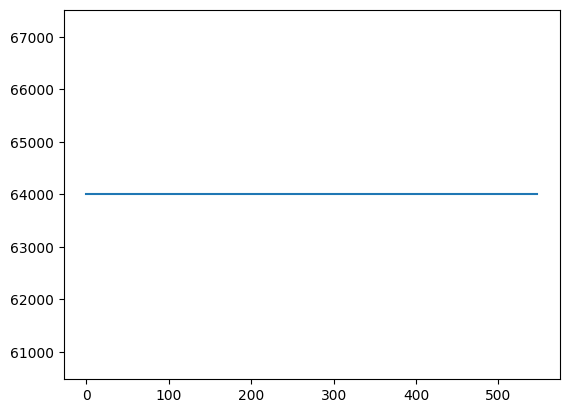

In [22]:
info = []
for data in df_filtered['lc_flux_2']:
    info.append(len(data))

plt.plot(np.arange(0,len(info)),info)

# Treinando a base em si
## usando tutorial do link: https://www.datacamp.com/tutorial/svm-classification-scikit-learn-python


## primeiro vamos organizar o dataset, para ter valores iguais de 0 e 1. Nessa primeira abordagem vamos treinar com 250 valores de cada tipo

In [23]:
# separate the dataset into two subsets based on the values in the "labeled" column
zeros = df_filtered[df_filtered['has_flux'] == 0]
ones = df_filtered[df_filtered['has_flux'] == 1]

num_zeros = len(zeros)
num_ones = len(ones)

print(num_zeros, num_ones)

300 248


In [24]:
selected_zeros = zeros.sample(n=248)
selected_ones = ones.sample(n=248)

selected_data = pd.concat([selected_zeros, selected_ones])
selected_data = selected_data.reset_index()
# transform the column of string arrays to numpy arrays
# selected_data['lc_flux'] = selected_data['lc_flux'].apply(lambda x: np.fromstring(x[1:-1], sep=','))

selected_data.describe()

,index,max_power,transit_time_at_max_power,has_flux
count,496.000000,4.960000e+02,496.000000,496.000000
mean,506.191532,4.849651e+04,183.917404,0.500000
std,285.247753,2.807725e+05,77.632825,0.500505
min,8.000000,2.973308e+01,120.754127,0.000000
25%,249.750000,2.962581e+02,138.124859,0.000000
50%,512.000000,1.002148e+03,148.578425,0.500000
75%,755.250000,4.222253e+03,189.683516,1.000000
max,983.000000,4.499717e+06,509.292285,1.000000


In [25]:
selected_data.tail()

,index,sky_position,max_power,period_at_max_power,transit_time_at_max_power,duration_at_max_power,has_flux,lc_flux,lc_flux_2
491,134,Kepler-137,1658.113447,37.47224722472247 d,140.154709,0.1 d,1,"[1.0001055001960992, 1.0002074241143646, 1.000...","[1.0001055001960992, 1.0002074241143646, 1.000..."
492,603,Kepler-610,6765.977340,268.31683168316835 d,271.137161,0.33 d,1,"[1.0045341750068486, 1.004287083608087, 1.0047...","[1.0045341750068486, 1.004287083608087, 1.0047..."
493,699,Kepler-709,10653.949900,11.534653465346535 d,140.937376,0.33 d,1,"[0.9999226138832843, 0.9995919297144613, 0.999...","[0.9999226138832843, 0.9995919297144613, 0.999..."
494,76,Kepler-79,1358.529295,82.20462046204621 d,133.656694,0.25 d,1,"[1.0009097679013192, 1.000123241190877, 1.0004...","[1.0009097679013192, 1.000123241190877, 1.0004..."
495,63,Kepler-64,3369.707494,19.994299429942995 d,142.912057,0.33 d,1,"[0.9997268740059236, 0.9996983749390892, 0.999...","[0.9997268740059236, 0.9996983749390892, 0.999..."


In [26]:
selected_data.shape

(496, 9)

## agora estamos prontos para treinar a rede

In [27]:
# Import train_test_split function
from sklearn.model_selection import train_test_split

In [28]:
my_list = []

for data in selected_data.lc_flux_2:
    my_list.append(data)

my_list[0:5]

[array([0.99751689, 0.99744462, 0.99812163, ..., 0.9989601 , 0.99989009,
        0.99905469]),
 array([0.99947937, 0.999853  , 1.00026631, ..., 1.00045812, 0.99992454,
        0.99957454]),
 array([1.00086047, 0.99988481, 1.00012485, ..., 0.99988129, 0.99981133,
        1.00006281]),
 array([0.99926233, 0.99931071, 0.9997636 , ..., 1.00000203, 0.99957945,
        0.99969532]),
 array([0.99983949, 1.00009986, 0.9997693 , ..., 1.00025349, 0.9999216 ,
        0.99964588])]

In [29]:
# Split dataset into training set and test set
X_train, X_test, y_train, y_test = train_test_split(list(selected_data.lc_flux_2), selected_data.has_flux, test_size=0.5, random_state=109) # 50% training and 50% test

In [30]:
print(f"{len(X_train)}, {len(y_train)}")

248, 248


In [31]:
#Import svm model
from sklearn import svm

#Create a svm Classifier
clf = svm.SVC(kernel='linear') # Linear Kernel

#Train the model using the training sets
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_test)

In [32]:
from sklearn import metrics

# Model Accuracy: how often is the classifier correct?
print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5120967741935484


In [33]:
# aplicando o treino com o X_Train
clf.fit(X_train, y_train)

#Predict the response for test dataset
y_pred = clf.predict(X_train)

print("Accuracy:",metrics.accuracy_score(y_test, y_pred))

Accuracy: 0.5040322580645161
